# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [40]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from and store into dataframe
dfjokes = pd.read_csv("jokes.csv")
dfjokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [10]:
dfjokes.shape

(24983, 101)

<b>Observation:</b>
- There are 24983 rows and 101 attributes in jokes dataset

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [12]:
# Reead the daa from column joke1 and and first 200 rows and store into dataframe
ratings = dfjokes.iloc[:200,1:]
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [13]:
ratings.shape

(200, 100)

<b>Observation:</b>
- Confirm that there are 200 rows and 100 attributes (from Joke1 to Joke100)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [14]:
# Checking that any null value in ratings dataframe
ratings.isnull().sum().sum()

0

In [15]:
# Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated"). Replacing 99 with 0 values ()
ratings.replace(99, 0, inplace=True)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [17]:
# Find the mean
jokes_mean = ratings.mean()

In [18]:
jokes_mean

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

### Q5. List most popular 10 jokes

In [20]:
# Print top 10 highest mean
jokes_mean.sort_values(ascending =False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

<b>Observation:</b>
- Joke50 is very popular and next popular joke is Joke36. 

# 2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [22]:
books = pd.read_csv("BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\syed.mohammed.yusuf\Anaconda3\lib\site-packages\IPython\core\inte

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [23]:
books.shape

(271360, 8)

<b>Observation:</b>
- There are 271360 rows and 8 attributes in books dataset.

In [24]:
users.shape

(278858, 3)

<b>Observation:</b>
- There are 278858 rows and 3 attributes in users dataset.

In [25]:
ratings.shape

(1149780, 3)

<b>Observation:</b>
- There are 1149780 rows and 3 attributes in ratings dataset.

In [27]:
# Print the columns in books dataset
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [28]:
# Print the columns in users dataset
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [29]:
# Print the columns in ratings dataset
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [30]:
# Dropping the last three attributs in books dataset
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], inplace=True, axis=1)

In [31]:
# Verify the list of columns in books dataset
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [37]:
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings_new = ratings_new[ratings['userID'].isin(users['userID'])]

<ipython-input-37-89c7152b2590>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings_new = ratings_new[ratings['userID'].isin(users['userID'])]


In [38]:
ratings_new.shape

(1031136, 3)

In [39]:
ratings_new.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [44]:
# Checking the values counts for each rating
ratings_new['bookRating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [47]:
# Removing the rating 0 as it is having highest count
ratings_new = ratings_new[ratings_new['bookRating'] != 0]

In [48]:
# Checking the value counts for each rating after removing 0 rating
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

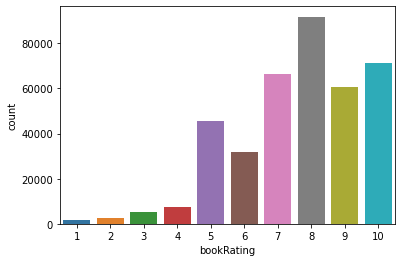

In [50]:
# Plotting the graph for book rating
sns.countplot(ratings_new['bookRating'])

<b>Observation:</b>
- Most of users have given rating as 8.  
- Most of the ratings from 5 to 10.

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [51]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

# Apply the scaling based on rating
reader = Reader(rating_scale=(1, 10))

In [54]:
# Getting the users who have rated atleast 100 books
ratings_filtered = ratings_new.groupby('userID').filter(lambda x: len(x) >=100)

In [55]:
ratings_filtered.shape

(103271, 3)

In [56]:
ratings_filtered.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [58]:
# Tranform the data to surprise format
data = Dataset.load_from_df(ratings_filtered[['userID', 'ISBN', 'bookRating']], reader)

In [68]:
# Checking that data is tranformed to surprise format
type(data)

surprise.dataset.DatasetAutoFolds

In [61]:
# Verify the columns
data.df

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [69]:
# Importing libraries
from surprise import SVD
from surprise import accuracy

In [86]:
# Split data to train and test using surprise model selection
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=1)

In [90]:
#Initiating the SVD 
svd_model = SVD()
# Train the model
svd_model.fit(trainset)

In [91]:
# Find the prediction on test data
test_pred = svd_model.test(testset)

In [92]:
# Find the accuracy by computing RMSE
accuracy.rmse(test_pred)

RMSE: 1.4967


1.4966824518857273

<b>Take Away:</b>
- We must use surprise model selection to split train and test data since we transformed the data to surprise format and build the model.

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [129]:
# Convert into data frame
pred = pd.DataFrame(test_pred)

In [138]:
# Create the function
def get_recomm(userID,n):
    recomm = pred[pred['uid']==userID][['uid','iid','est']].sort_values(by='est',ascending=False).head(n)
    return recomm


In [140]:
# Find the top 5 recommendations
get_recomm(23902, 5)

,uid,iid,est
20688,23902,0446310786,9.127536
9352,23902,0399141146,8.963639
15566,23902,0140006680,8.664020
9069,23902,0020223722,8.361634
10556,23902,0571081789,8.308916


- This function helps to get the recommendations based on the ratings for specific user. 